In [34]:
import pandas as pd

df = pd.read_csv("Walmart_Sales_clean.csv")
print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [42]:
df['Fuel_Category'] = pd.qcut(df['Fuel_Price'], q=3, labels=['Low_Fuel', 'Medium_Fuel', 'High_Fuel'])
print(df[['Fuel_Price','Fuel_Category']])


      Fuel_Price Fuel_Category
0          2.572      Low_Fuel
1          2.548      Low_Fuel
2          2.514      Low_Fuel
3          2.561      Low_Fuel
4          2.625      Low_Fuel
...          ...           ...
6430       3.997     High_Fuel
6431       3.985     High_Fuel
6432       4.000     High_Fuel
6433       3.969     High_Fuel
6434       3.882     High_Fuel

[6435 rows x 2 columns]


In [36]:
print(df['Fuel_Category'].nunique())
print(df['Fuel_Category'].unique())


3
['Low_Fuel', 'Medium_Fuel', 'High_Fuel']
Categories (3, object): ['Low_Fuel' < 'Medium_Fuel' < 'High_Fuel']


In [37]:
from mlxtend.preprocessing import TransactionEncoder

transactions = df['Fuel_Category'].astype(str).apply(lambda x: [x]).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)
print(df_te.head())


   High_Fuel  Low_Fuel  Medium_Fuel
0      False      True        False
1      False      True        False
2      False      True        False
3      False      True        False
4      False      True        False


In [38]:
from mlxtend.frequent_patterns import fpgrowth, fpmax

fpg = fpgrowth(df_te, min_support=0.05, use_colnames=True)
fpmax_sets = fpmax(df_te, min_support=0.05, use_colnames=True)

print(fpg)
print(fpmax_sets)


    support       itemsets
0  0.333800     (Low_Fuel)
1  0.336286  (Medium_Fuel)
2  0.329915    (High_Fuel)
    support       itemsets
0  0.329915    (High_Fuel)
1  0.333800     (Low_Fuel)
2  0.336286  (Medium_Fuel)


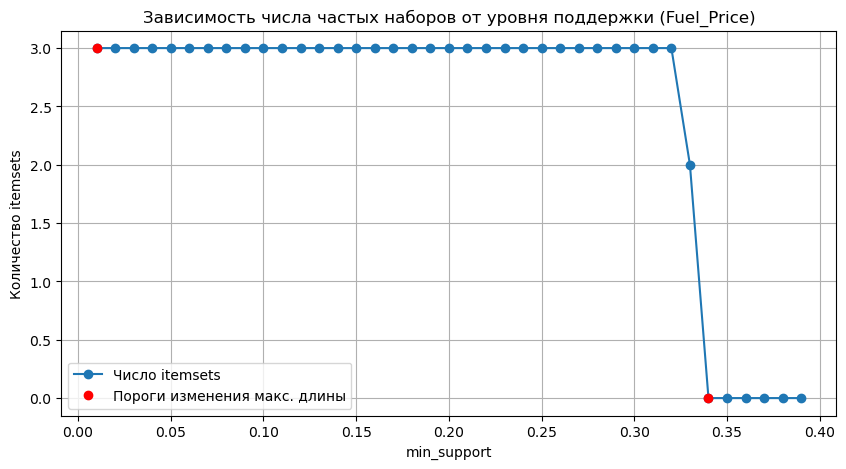

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import isnan
from mlxtend.frequent_patterns import fpgrowth

min_support_range = np.arange(0.01, 0.4, 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_te.columns)

for min_support in min_support_range:
    fpg_temp = fpgrowth(df_te, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg_temp))
    fpg_temp['length'] = fpg_temp['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg_temp['length'].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
        threshold_supports.append(min_support)
        threshold_lengths.append(len(fpg_temp))

plt.figure(figsize=(10,5))
plt.plot(min_support_range.tolist(), itemsets_lengths, marker='o', label='Число itemsets')
plt.plot(threshold_supports, threshold_lengths, 'ro', label='Пороги изменения макс. длины')
plt.xlabel("min_support")
plt.ylabel("Количество itemsets")
plt.title("Зависимость числа частых наборов от уровня поддержки (Fuel_Price)")
plt.legend()
plt.grid(True)
plt.show()


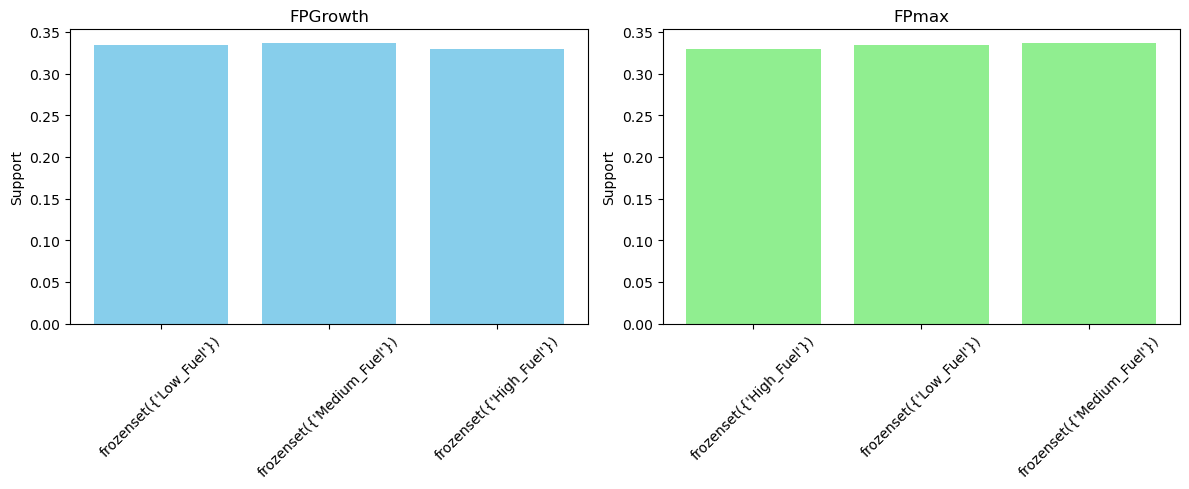

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(fpg['itemsets'].astype(str), fpg['support'], color='skyblue')
plt.title("FPGrowth")
plt.ylabel("Support")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(fpmax_sets['itemsets'].astype(str), fpmax_sets['support'], color='lightgreen')
plt.title("FPmax")
plt.ylabel("Support")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
